In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read in cleaned data, and clean again
cleaned_data = pd.read_csv("data/data_noHDI.csv")
del cleaned_data["country-year"]
cleaned_data.head()

,Unnamed: 0,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


In [3]:
cleaned_data["age"].value_counts()

35-54 years    4642
25-34 years    4642
15-24 years    4642
75+ years      4642
55-74 years    4642
5-14 years     4610
Name: age, dtype: int64

In [4]:
cleaned_data["sex"].value_counts()

female    13910
male      13910
Name: sex, dtype: int64

In [5]:
# Grouping

#cleaned_data.dtypes

sub_data = cleaned_data.loc[:,["country","year","sex","age","suicides_no"]]
#group_data = sub_data.groupby(["country","age","sex"])
group_data = sub_data.groupby(["age","sex"])
#group_data.count()

suicide_sum = pd.DataFrame(group_data["suicides_no"].sum())

In [6]:
# DataFrame Overview

suicide_sum.rename(columns = {"suicides_no":"suicides_sum"})
suicide_sum.head()

suicides_no
age         sex                
15-24 years female       175437
            male         633105
25-34 years female       208823
            male         915089
35-54 years female       506233

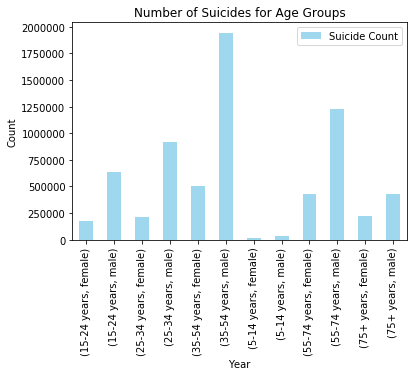

In [7]:
# Bar Chart based on grouped data

bar_chart = suicide_sum.plot(kind = "bar", color = "skyblue", width = 0.5, alpha = 0.8, stacked = True)
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Number of Suicides for Age Groups")

bar_chart.legend(["Suicide Count"])

<Figure size 432x288 with 0 Axes>

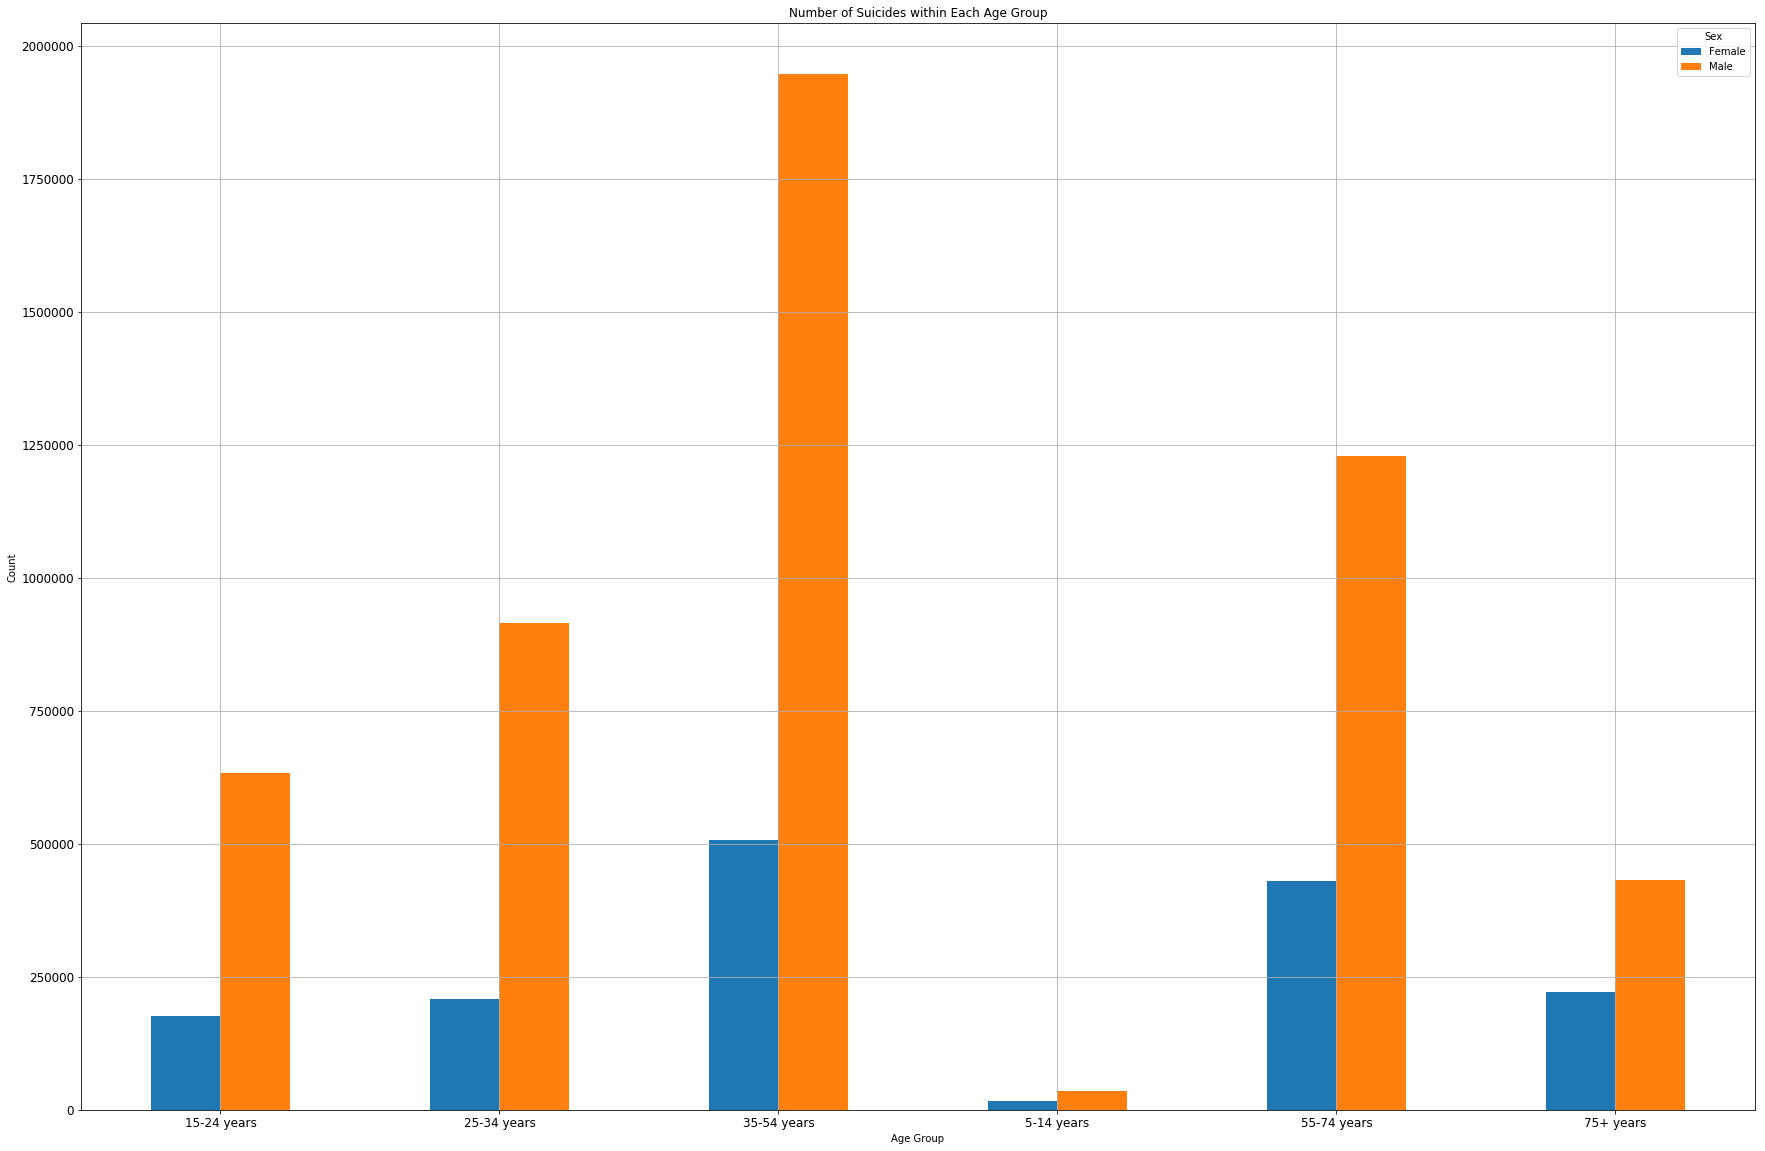

In [14]:
# Bar Chart using Pivot

plt.figure()

age_group_draft = sub_data["age"].unique().tolist()
age_group = ['15-24 years','15-24 years',
             '25-34 years', '25-34 years','35-54 years', '35-54 years',
             '5-14 years', '5-14 years', 
             '55-74 years', '55-74 years','75+ years', '75+ years']
sex = ["female","male","female","male",
      "female","male","female","male",
      "female","male","female","male"]
count = group_data["suicides_no"].sum().tolist()

pivot_table = pd.DataFrame({"age_group": age_group, "sex": sex, "suicide_count": count})

pivot = pivot_table.pivot("age_group", "sex")
pivot.plot(kind='bar', rot = 0, figsize = (30,20), fontsize = 12)

plt.legend(["Female","Male"],title="Sex")
plt.title("Number of Suicides within Each Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")

plt.grid()
plt.show()

#print(len(age_group))
#print(len(sex))
#print(len(count))
#pivot_table

In [ ]:
# Need another graph showing sum of suicide counts for female and male, just two bars 
# could also do a two sample ttest 

In [ ]:
# generally the number of suicides in women is less than that in men
# men in their 35-54 have significantly high suicide rates